10 [[-20.]
 [-20.]]
-30 [[20.]
 [20.]]
-10 [[20.]
 [20.]]

Vista corta de los datos
   A  B  S
0  0  0  0
1  0  1  1
2  1  0  1
3  1  1  1
[[0 0 1]
 [0 1 0]
 [1 0 0]]
m = 3


C:\Users\mario\AppData\Local\Temp\ipykernel_16964\392227179.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  salidas[0,a] = self.neuronas[a].sigmoide(X)
C:\Users\mario\AppData\Local\Temp\ipykernel_16964\392227179.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  salidas[0,a] = self.neuronas[a].sigmoide(X)


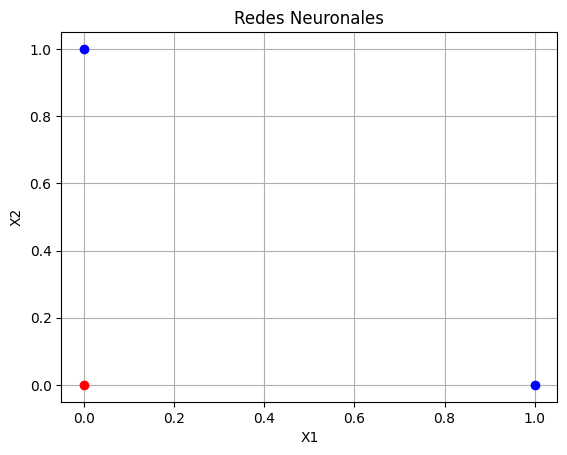

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


class Neurona:
    def __init__(self, N):
        self.b = 1
        self.w = np.zeros([N,1])
        for a in range(N):
            self.w[a,0] = np.random.randn()*0.1        
    
    def sigmoide(self, X):
        return 1/(1 + np.exp(-(np.dot(X, self.w)+self.b)))
    
    def __str__(self):
        return f"b= {self.b}, \nw= \n{self.w}"
        

class Capa:
    def __init__(self, neuronas, entradas):
        self.neuronas = []        
        for a in range(neuronas):
            self.neuronas.append(Neurona(entradas))
    
    def forwardPropagation(self, X):
        salidas = np.zeros([1, len(self.neuronas)])
        for a in range(len(self.neuronas)):
            salidas[0,a] = self.neuronas[a].sigmoide(X)
        return salidas
    
    def backPropagation(self, error):
        a = 1
        
    def __str__(self):
        cadena = ""
        i = 1
        for a in self.neuronas:
            cadena += "Neurona " + str(i) + ":\n"
            cadena += str(a) + "\n"
            i = i + 1
        return cadena
    
class RedNeuronal:
    "ejemplo de llamada seria: RedNeuronal([4,2,1]), donde el 4 es el número de variables de entrada, el 2 es el número de neuronas de la primer capa, y 1 es l capa de salida"
    def __init__(self, capas):
        self.capas = []
        for a in range(len(capas)-1):
            self.capas.append(Capa(capas[a+1], capas[a]))
    
    def forwardPropagation(self, X):
        for a in range(len(self.capas)):
            X = self.capas[a].forwardPropagation(X)
            #print(f"x= {X}")
        return X
    
    def prediccion(self, X):
        m = X.shape[0]
        print(f"m = {m}")
        Y = np.zeros([m,1])
        for a in range(m):
            Y[a] = self.forwardPropagation(X[a,:])
        return Y
    
    def getCosto(self, X, Y):
        costo = 0
        m = len(Y)
        for a in range(m):
            yp = self.forwardPropagation(X[a,:])
            loss = -(Y[a] * np.log(yp) + (1-Y[a]) * np.log(1-yp))
            costo += loss
        costo /= m
        return costo
    
    def backPropagation(self, X, Y):
        error = self.getCosto(X,Y)
    
    def __str__(self):
        cadena = "Red Neuronal que tiene " + str(len(self.capas[0].neuronas[0].w)) + " entradas y " + str(len(self.capas)) +" capas\n"
        i = 1
        for a in self.capas:
            cadena += "Capa "+ str(i) + ":\n"
            cadena += str(a) + "\n"
            i = i + 1
        return cadena


def formatoConfiguracion(configuracion):
    formato = []
    for digito in range(len(configuracion)-1):
        if not configuracion[digito] == " ":
            formato.append(int(configuracion[digito]))
    return formato

archivo = open("RedNeuronal.txt")
lineas = archivo.readlines()
configuracion_red = formatoConfiguracion(lineas[0])
red_neuronal = RedNeuronal(configuracion_red)
contador_neurona = 1
for capa in red_neuronal.capas:
    for neurona in capa.neuronas:
        entrada = lineas[contador_neurona].split(" ")
        neurona.b = int(entrada[0])
        for n in range(neurona.w.shape[0]):
            neurona.w[n, 0] = int(entrada[n+1])
        print(neurona.b, neurona.w)
        contador_neurona += 1

datos=pd.read_csv('data/or.csv', sep=',')
print("\nVista corta de los datos")
print(datos.head())
datos = datos.to_numpy()
N = datos.shape[1] - 1
X = datos[:,0:N]
Y = datos[:,N]

entrada = X[3,:]
B = red_neuronal.forwardPropagation(entrada)
#B = red_neuronal.getCosto(X,Y)

datos=pd.read_csv('entrada.csv', sep=',')#,header=None)
#datosPrueba
datos = datos.to_numpy()
print(datos)
N = datos.shape[1] - 1
m = datos.shape[0]
X = datos[:,0:N]
Yp = red_neuronal.prediccion(X)
#print(f"prediccion= {Y}")

X0 = [j for j in range(m) if Yp[j]<0.5]
X1 = [j for j in range(m) if Yp[j]>=0.5]

with open("salida.txt", "w") as salida:
    for registro in range(len(datos)): 
        cadena = ""
        for dato in range(len(datos[registro])-1):
            cadena += f"{datos[registro, dato]} "
        cadena += f"{Yp[registro]} \n"
        salida.write(cadena)



plt.plot(X[X0,0],X[X0,1],"bo")
plt.plot(X[X1,0],X[X1,1],"ro")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid()
plt.title("Redes Neuronales")
plt.show()